This section imports all the code. If you get import errors, review the installation proceedure. Make sure you are using the correct kernel. You will need to explicitly set up a kernel for the environment you've created.

In [1]:
from smokedetectoroptimization.optimizer import optimize, evaluate_optimization, optimization_logger
from smokedetectoroptimization.smoke_source import SmokeSource, smoke_logger
from smokedetectoroptimization.constants import (ALARM_THRESHOLD, FALSE_ALARM_THRESHOLD, 
                                                 SMOOTH_PLOTS)

In [2]:
from constants import SMOKE_FOLDERS, FALSE_ALARM_FOLDERS

The goal is to set the level of detail we get printed out. The smoke logger appears to be broken since it should display which directory it's loading from.

In [3]:
import logging
optimization_logger.setLevel(logging.ERROR)
smoke_logger.setLevel(logging.DEBUG)

This is simply a visualization style thing. It controls whether plots are interpolated, which is prettier, or whether they are dots, which is arguably more informative. Note, for this to have any effect, SMOOTH_PLOTS must be already imported

In [4]:
SMOOTH_PLOTS = True

Parameterization can be "xy", "yz", "xz", "xyz", or "phi_theta"  
Function type can be "multiobjective_competing", "multiobjective_counting", or "worst_case", which is the one we are used to. "fastest" and "second are also supported, but I would not recommend using them.  
Interplolation method can be "nearest", which takes the nearest value, or "linear" or "cubic" The latter two seem to take much longer.  

Loading C:\Users\russe\dev\SmokeDetectorOptimization\data\first_computer_full3D


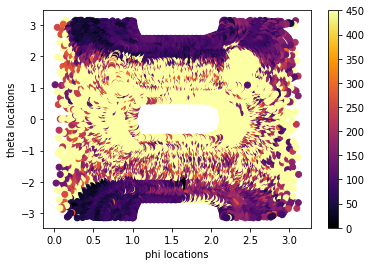

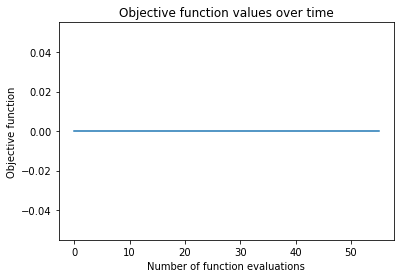

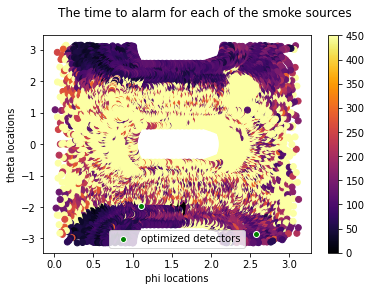

Showing a 3D plot of time to alarm with final locations in green


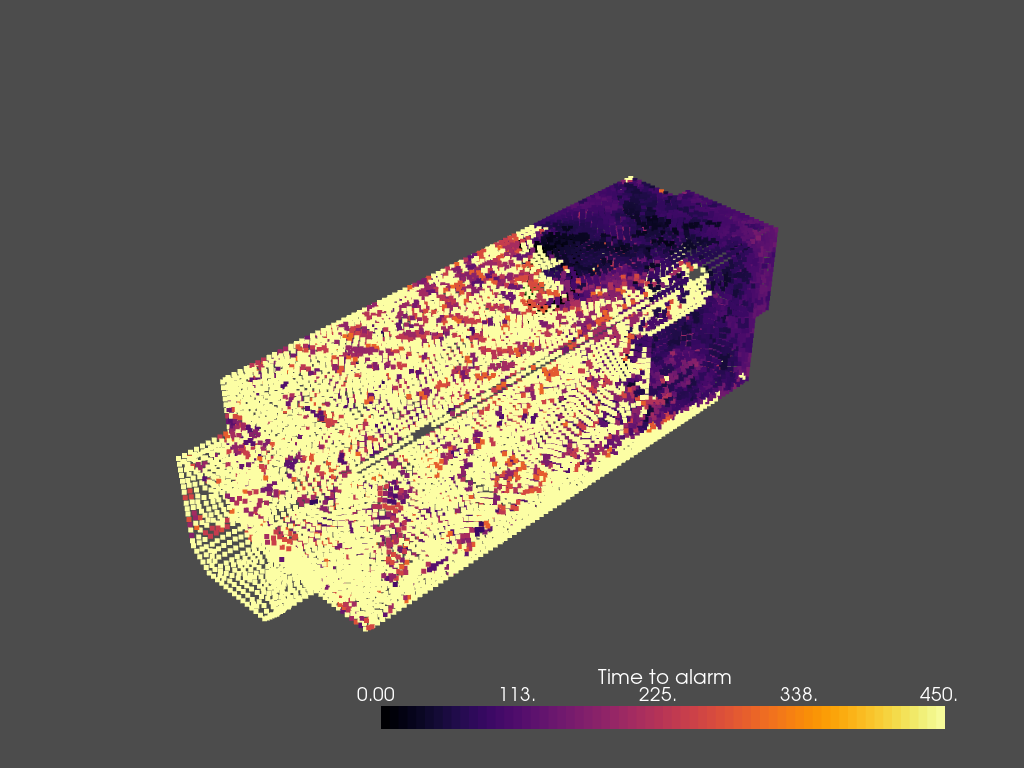

Begining to visualize slices. May take a while


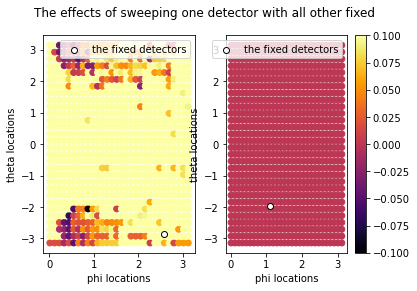

Parameterized, phi location : p, theta location : a
3D, X : X, Y : Y, Z : Z
------------
Parameterized, phi location : p, theta location : a
3D, X : X, Y : Y, Z : Z
------------
The final value was 0.0


In [5]:
PARAMETERIZATION = "phi_theta"
FUNCTION_TYPE = "worst_case_TTA"
INTERPOLATION_METHOD = "nearest"
NUM_DETECTORS = 2
VIS = True

sources = []
# This notation just takes the first two folders
# This makes it much faster to evaluate the optimization
for data_dir in SMOKE_FOLDERS[:1]:
    # create a smoke source and then get it's time to alarm with a given parameterization
    print(f"Loading {data_dir}")
    sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS,
                               alarm_threshold=ALARM_THRESHOLD))
    
res = optimize(sources,
               num_detectors=NUM_DETECTORS,
               function_type=FUNCTION_TYPE,
               interpolation_method=INTERPOLATION_METHOD)

Compute summary statistics. Note this will use the sources from the most recently run cell.

100%|██████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.08s/it]


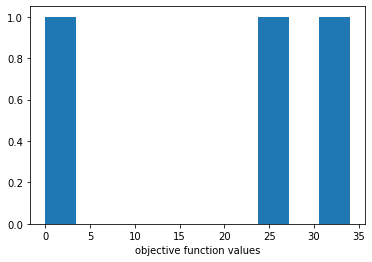

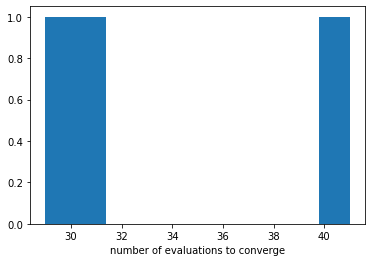

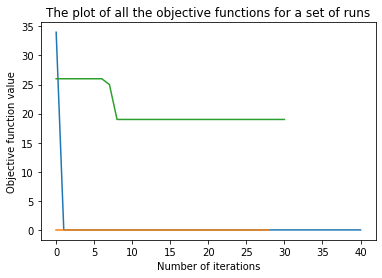

In [6]:
statistics = evaluate_optimization(sources=sources,
                      num_iterations=3,
                      visualize_summary=True,
                      function_type=FUNCTION_TYPE,
                      interpolation_method=INTERPOLATION_METHOD)

Run multiobjective optimization with the false alarm source. Uses $\phi$, $\theta$ parameterization and nearest interpolation method.

Loading C:\Users\russe\dev\SmokeDetectorOptimization\data\bike_full3D


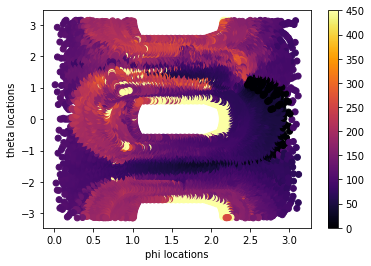

In [ ]:
PARAMETERIZATION = "phi_theta"
FUNCTION_TYPE = "multiobjective_competing"
INTERPOLATION_METHOD = "nearest"
NUM_DETECTORS = 2

# Clean up the output by turning off visualization and messages
VIS_SMOKE = False
smoke_logger.setLevel(logging.WARNING)

VIS_FALSE = True

sources = []
for data_dir in SMOKE_FOLDERS:
    # create a smoke source and then get it's time to alarm with a given parameterization
    sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS_SMOKE,
                               alarm_threshold=ALARM_THRESHOLD))
    
bad_sources = []
for data_dir in FALSE_ALARM_FOLDERS:
    print(f"Loading {data_dir}")
    bad_sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS_FALSE,
                               alarm_threshold=FALSE_ALARM_THRESHOLD))
    
optimize(sources,
         bad_sources=bad_sources,
         num_detectors=NUM_DETECTORS,
         function_type=FUNCTION_TYPE,
         interpolation_method=INTERPOLATION_METHOD)

Run multiobjective optimization with counting objective. Uses $\phi$, $\theta$ parameterization and nearest interpolation method. The number of detectors isn't set, it is estimated from the number of sources and then optimized. 

Run single objective optimization with $\phi$, $\theta$ parameterization.

In [ ]:
PARAMETERIZATION = "phi_theta" # could be "xy", "yz", "xz"
FUNCTION_TYPE = "worst_case_TTA" # could be "worst_case" "fastest", "second", "multiobjective_counting", "multiobjective_competing"
INTERPOLATION_METHOD = "nearest" # could be "linear"
NUM_DETECTORS = 2

VIS_SMOKE = False
smoke_logger.setLevel(logging.WARNING)

sources = []
for data_dir in SMOKE_FOLDERS:
    # create a smoke source and then get it's time to alarm with a given parameterization
    sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS_SMOKE,
                               alarm_threshold=ALARM_THRESHOLD))

res = optimize(sources,
         num_detectors=NUM_DETECTORS,
         function_type=FUNCTION_TYPE,
         interpolation_method=INTERPOLATION_METHOD)

Run single objective optimization with X, Y, Z parameterization.

In [ ]:
PARAMETERIZATION = "xyz"
FUNCTION_TYPE = "worst_case_TTA"
INTERPOLATION_METHOD = "nearest"
NUM_DETECTORS = 2
VIS_SMOKE = True # We again want to see this one since it is 3D

sources = []
for data_dir in SMOKE_FOLDERS:
    # create a smoke source and then get it's time to alarm with a given parameterization
    print(f"Loading {data_dir}")
    sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS_SMOKE,
                               alarm_threshold=ALARM_THRESHOLD))
res = optimize(sources,
         num_detectors=NUM_DETECTORS,
         function_type=FUNCTION_TYPE,
         interpolation_method=INTERPOLATION_METHOD)